In [29]:
from sklearn.datasets import fetch_openml
import numpy as np
from tqdm.notebook import tqdm
dataset = fetch_openml(name="qsar-biodeg", parser="auto")

X = dataset.data.values.astype(float)
y = dataset.target.values

X_init_train = X[:300]
y_init_train = y[:300]

X_run = X[300:]
y_run = y[300:]

In [30]:
from online_cp import ConformalNearestNeighboursClassifier
from online_cp import Evaluation, Err, OF, OE
cp = ConformalNearestNeighboursClassifier(k=1, label_space=np.unique(y))

metrics = Evaluation(err=Err, oe=OE, of=OF)

cp.learn_initial_training_set(X_init_train, y_init_train)

P_values = {'1': [], '2': []}

for i, (obj, lab) in tqdm(enumerate(zip(X_run, y_run)), total=y_run.size):
    
    # Make prediction
    Gamma, p_values, D = cp.predict(obj, epsilon=0.1, return_p_values=True, return_update=True) 

    P_values['1'].append(p_values['1'])
    P_values['2'].append(p_values['2'])
    # Learn the label
    # cp.learn_one(obj, lab, D)

    metrics.update(y=lab, Gamma=Gamma, p_values=p_values)

  0%|          | 0/755 [00:00<?, ?it/s]

/home/johan/Documents/PhD/PREMACOP/OnlineConformalPrediction/src/online_cp/classifiers.py:306: RuntimeWarning: divide by zero encountered in divide
  Alpha = np.nan_to_num(same_label_distances / different_label_distances, nan=np.inf)


In [31]:
import pandas as pd

df_p = pd.DataFrame(P_values)

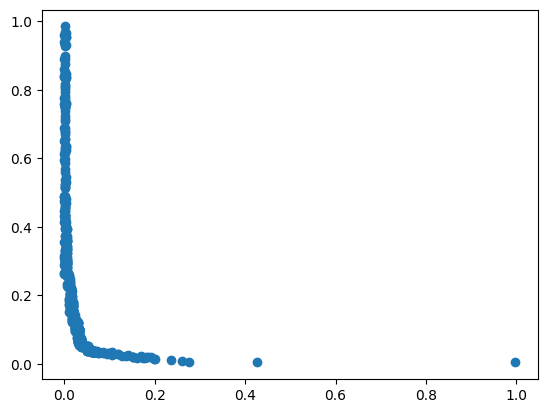

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df_p['1'], df_p['2'])